# Worked Problem Assignment 1

### <p style="text-align: right;">  Kyle Taft

In [2]:
# Import packages
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

____

### Question 1


My problem is inspired by the problem set from "Intoduction to Classical Mechanics" by David Morin. The problem is summarized as follows: 

Consider two connected masses dangling downwards from a string with two pullys inbetween them. To complicate the problem, the mass on the right act as a pendulum and swings back and forth. Find the equations of motions for the pendulum. An image of the setup is shown below (Morin, 2008).

In [3]:
Image(url= "https://github.com/KyleTaft/Fall23/blob/main/PHY415/images/Screenshot%202023-09-14%20214931.png?raw=true", width=300)

### Question 2 & 3

In [4]:
Image(url= "https://github.com/KyleTaft/Fall23/blob/main/PHY415/images/Screenshot%202023-09-14%20233202.png?raw=true", width=700)

### Question 4

Theses are the EOMs we calculate:
$$\ddot{r} = \frac{r\dot{\theta^2}-g(1-cos\theta)}{2} $$
$$\ddot{\theta} = \frac{-2\dot{r}\dot{\theta}-grsin\theta}{r^2} $$

<br>
Additionally, we can make the following substitutions to simplify the equations:

$$\dot{r} = v $$

$$\dot{\theta} = \omega $$

$$\dot{v} = \frac{r\omega^2-g(1-cos\theta)}{2}$$ 

$$\dot{\omega} = \frac{-2v\omega-grsin\theta}{r^2}$$

<!-- -2\frac{v\omega}{r} -->
<!-- -2*v*omega/r -->

In [5]:
#Derivatives Function
def diffyqs(t, curr_vals, g):

    r, v, theta, omega = curr_vals
    
    vdot = 0.5*(r*omega**2 - g*(1-np.cos(theta)))

    omegadot = (-2*v*omega - g*np.sin(theta)*r)/r**2

    return v, vdot, omega, omegadot

#Time Setup
tmax = 10
dt = 0.01 # unneccecarily small dt to make plot super smooth
t = np.arange(0, tmax, dt)

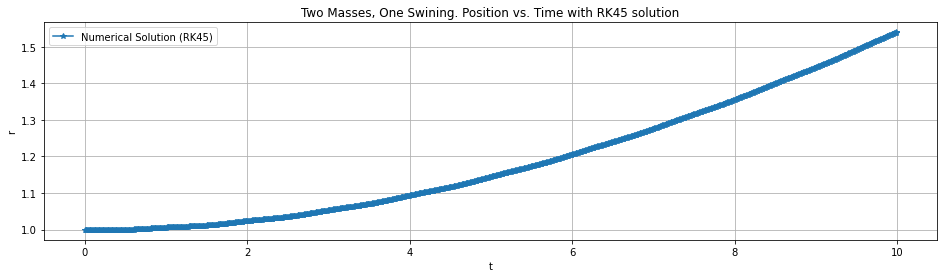

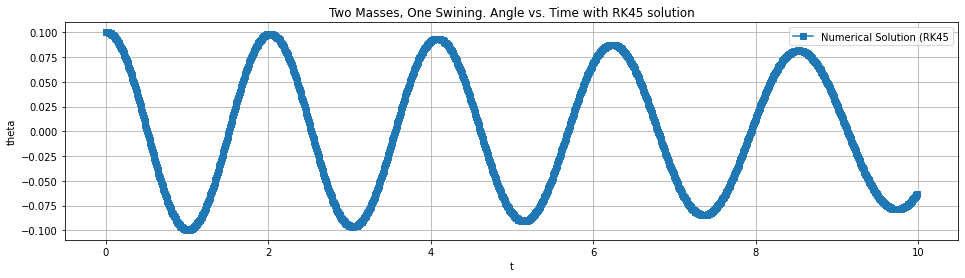

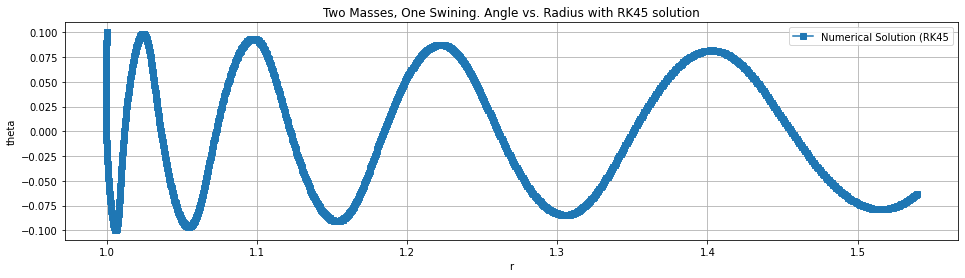

In [15]:
# Here we choose initial conditions that are closer to stability (i.e. small perturbations from SHO)

#Parameters and Initial Conditions
g = 9.81
x0 = [1,0,0.1,0.01] 

# 4. Call Integrator 
solved = solve_ivp(diffyqs, (0, tmax), x0, t_eval = t, args = (g, ), method="RK45")

plt.figure(figsize=(16, 4))
plt.plot(t, solved.y[0], label = "Numerical Solution (RK45)", marker='*')
plt.title("Two Masses, One Swining. Position vs. Time with RK45 solution")
plt.xlabel("t")
plt.ylabel("r")
plt.legend()
plt.grid()

plt.figure(figsize=(16,4))
plt.plot(t,solved.y[2], label = "Numerical Solution (RK45", marker='s')
plt.title("Two Masses, One Swining. Angle vs. Time with RK45 solution")
plt.xlabel("t")
plt.ylabel("theta")
plt.legend()
plt.grid()

plt.figure(figsize=(16,4))
plt.plot(solved.y[0],solved.y[2], label = "Numerical Solution (RK45", marker='s')
plt.title("Two Masses, One Swining. Angle vs. Radius with RK45 solution")
plt.xlabel("r")
plt.ylabel("theta")
plt.legend()
plt.grid()

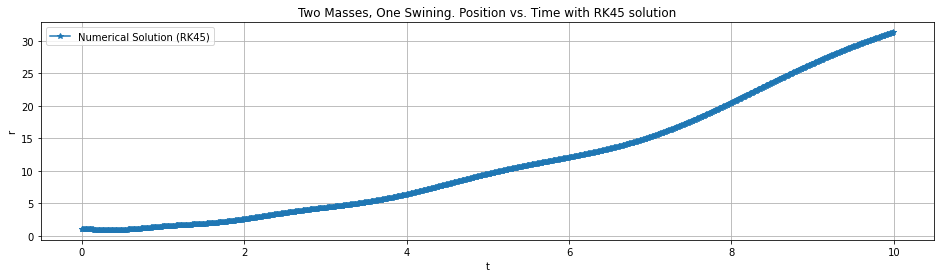

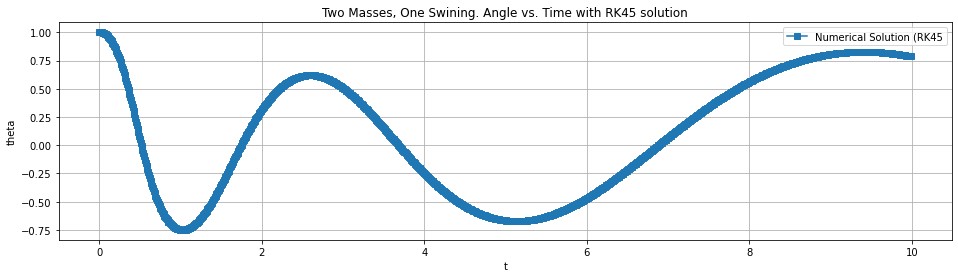

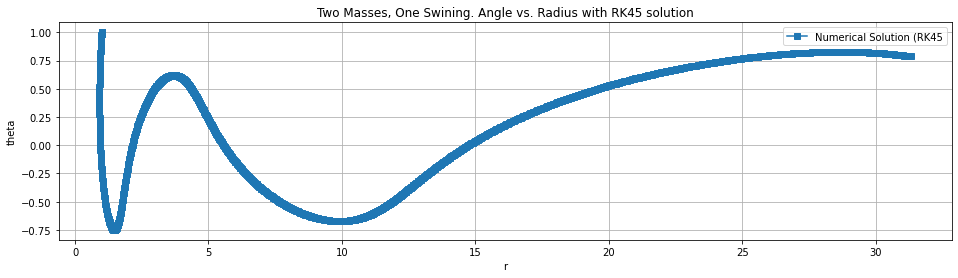

In [11]:
# Here we choose initial conditions that are further from stability

#Parameters and Initial Conditions
g = 9.81
x0 = [1,0,1,0.1] 

# 4. Call Integrator 
solved2 = solve_ivp(diffyqs, (0, tmax), x0, t_eval = t, args = (g, ), method="RK45")

plt.figure(figsize=(16, 4))
plt.plot(t, solved2.y[0], label = "Numerical Solution (RK45)", marker='*')
plt.title("Two Masses, One Swining. Position vs. Time with RK45 solution")
plt.xlabel("t")
plt.ylabel("r")
plt.legend()
plt.grid()

plt.figure(figsize=(16,4))
plt.plot(t,solved2.y[2], label = "Numerical Solution (RK45", marker='s')
plt.title("Two Masses, One Swining. Angle vs. Time with RK45 solution")
plt.xlabel("t")
plt.ylabel("theta")
plt.legend()
plt.grid()

plt.figure(figsize=(16,4))
plt.plot(solved2.y[0],solved2.y[2], label = "Numerical Solution (RK45", marker='s')
plt.title("Two Masses, One Swining. Angle vs. Radius with RK45 solution")
plt.xlabel("r")
plt.ylabel("theta")
plt.legend()
plt.grid()

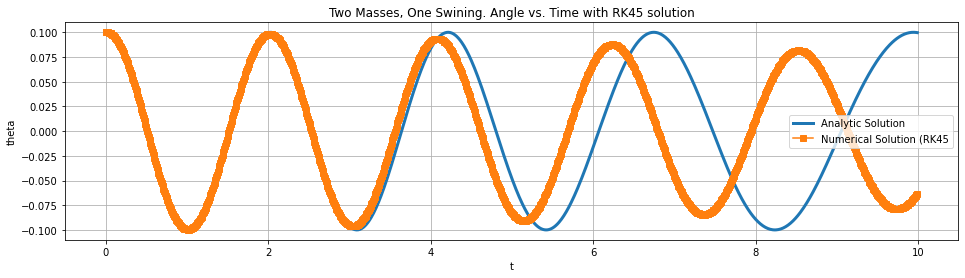

In [16]:
# Here we choose initial conditions that are further from stability

#Parameters and Initial Conditions
g = 9.81
x0 = [1,0,0.1,0.01] 


def theta_analytic(t, g, r, initTheta):
    omega = np.sqrt(g/r)
    return initTheta*np.cos(omega*t)


plt.figure(figsize=(16,4))
plt.plot(t,theta_analytic(t, g,solved.y[0],x0[2]), label = "Analytic Solution", linewidth = 3)
plt.plot(t,solved.y[2], label = "Numerical Solution (RK45", marker='s')
plt.title("Two Masses, One Swining. Angle vs. Time with RK45 solution")
plt.xlabel("t")
plt.ylabel("theta")
plt.legend()
plt.grid()
